In [26]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, concatenate, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import requests
import tensorflow as tf


In [27]:
# Load and preprocess the data
data = pd.read_csv('/content/drive/MyDrive/Truth seek/Features_For_Traditional_ML_Techniques.csv')
data = data.drop(columns=['Unnamed: 0', 'majority_target', 'statement', 'embeddings'])

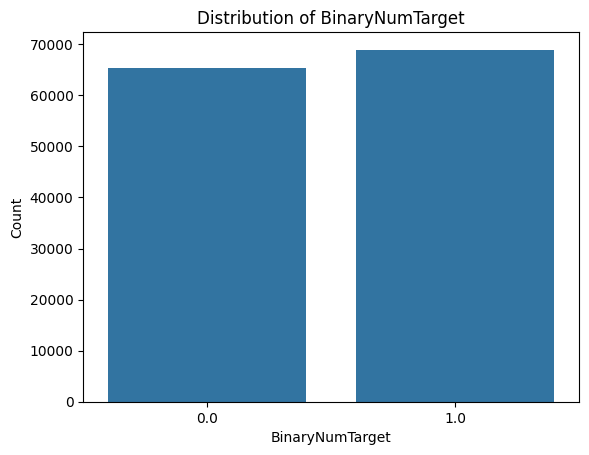

In [28]:
# Plot target variable distribution
sns.countplot(x='BinaryNumTarget', data=data)
plt.xlabel('BinaryNumTarget')
plt.ylabel('Count')
plt.title('Distribution of BinaryNumTarget')
plt.show()

In [29]:
# Prepare tweet data for model
max_words = 1000  # Max number of words to keep in Tokenizer
max_seq_length = 100  # Max sequence length for padding


In [30]:
import re

def clean_text(text):
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)  # Remove multiple spaces
    text = text.lower().strip()  # Convert to lowercase and strip leading/trailing spaces
    return text

data['tweet'] = data['tweet'].apply(clean_text)


In [31]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['tweet'])
sequences = tokenizer.texts_to_sequences(data['tweet'])
word_index = tokenizer.word_index

tweet_data = pad_sequences(sequences, maxlen=max_seq_length)

In [32]:
# Target variable
target = data['BinaryNumTarget'].values

In [33]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(tweet_data, target, test_size=0.2, random_state=42)

In [34]:
# RNN Model Architecture
text_input = Input(shape=(max_seq_length,))
embedding_layer = Embedding(max_words, 100)(text_input)
lstm_layer = LSTM(64, return_sequences=False)(embedding_layer)
lstm_layer = Dropout(0.5)(lstm_layer)
dense_layer = Dense(64, activation='relu')(lstm_layer)
dense_layer = Dropout(0.5)(dense_layer)
output_layer = Dense(1, activation='sigmoid')(lstm_layer)

In [35]:
optimizer = tf.keras.optimizers.AdamW(learning_rate=0.00001)

In [36]:
model = Model(inputs=text_input, outputs=output_layer)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [37]:
# Model Training
callbacks = [EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True)]
history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_split=0.2, callbacks=callbacks)


Epoch 1/50
2684/2684 ━━━━━━━━━━━━━━━━━━━━ 204s 74ms/step - accuracy: 0.5409 - loss: 0.6891 - val_accuracy: 0.6729 - val_loss: 0.6570
Epoch 2/50
2684/2684 ━━━━━━━━━━━━━━━━━━━━ 197s 73ms/step - accuracy: 0.7193 - loss: 0.6064 - val_accuracy: 0.8011 - val_loss: 0.4625
Epoch 3/50
2684/2684 ━━━━━━━━━━━━━━━━━━━━ 202s 73ms/step - accuracy: 0.8445 - loss: 0.4377 - val_accuracy: 0.8635 - val_loss: 0.3671
Epoch 4/50
2684/2684 ━━━━━━━━━━━━━━━━━━━━ 192s 72ms/step - accuracy: 0.8792 - loss: 0.3463 - val_accuracy: 0.8876 - val_loss: 0.3067
Epoch 5/50
2684/2684 ━━━━━━━━━━━━━━━━━━━━ 211s 75ms/step - accuracy: 0.8925 - loss: 0.2977 - val_accuracy: 0.8952 - val_loss: 0.2809
Epoch 6/50
2684/2684 ━━━━━━━━━━━━━━━━━━━━ 195s 72ms/step - accuracy: 0.9019 - loss: 0.2708 - val_accuracy: 0.9021 - val_loss: 0.2655
Epoch 7/50
2684/2684 ━━━━━━━━━━━━━━━━━━━━ 196s 73ms/step - accuracy: 0.9097 - loss: 0.2545 - val_accuracy: 0.9071 - val_loss: 0.2527
Epoch 8/50
2684/2684 ━━━━━━━━━━━━━━━━━━━━ 195s 73ms/step - accuracy: 

In [38]:
# Print validation accuracy for each epoch
val_accuracy = history.history['val_accuracy']
print("Validation Accuracy for each epoch:")
for epoch, accuracy in enumerate(val_accuracy, 1):
    print(f"Epoch {epoch}: {accuracy:.4f}")

# Print final validation accuracy
final_val_accuracy = val_accuracy[-1]
print(f'Final Validation Accuracy: {final_val_accuracy:.4f}')

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Validation Accuracy for each epoch:
Epoch 1: 0.6729
Epoch 2: 0.8011
Epoch 3: 0.8635
Epoch 4: 0.8876
Epoch 5: 0.8952
Epoch 6: 0.9021
Epoch 7: 0.9071
Epoch 8: 0.9109
Epoch 9: 0.9113
Epoch 10: 0.9120
Epoch 11: 0.9158
Epoch 12: 0.9175
Epoch 13: 0.9184
Epoch 14: 0.9184
Epoch 15: 0.9206
Epoch 16: 0.9184
Epoch 17: 0.9210
Epoch 18: 0.9226
Epoch 19: 0.9223
Epoch 20: 0.9234
Epoch 21: 0.9233
Epoch 22: 0.9220
Epoch 23: 0.9243
Epoch 24: 0.9260
Epoch 25: 0.9267
Epoch 26: 0.9254
Epoch 27: 0.9261
Epoch 28: 0.9277
Epoch 29: 0.9259
Epoch 30: 0.9260
Epoch 31: 0.9252
Epoch 32: 0.9279
Epoch 33: 0.9266
Epoch 34: 0.9284
Epoch 35: 0.9255
Final Validation Accuracy: 0.9255
839/839 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.9334 - loss: 0.1819
Test Accuracy: 93.25%


In [39]:
# Define the function to get relevant news URLs
def get_relevant_urls(tweet_text):
    api_key = '06cba0dcd3d84dc3bc34aac90e62ba89'  # Replace with your actual NewsAPI.org API key
    url = f'https://newsapi.org/v2/everything?q={tweet_text}&sortBy=relevancy&apiKey={api_key}'

    response = requests.get(url)
    response_data = response.json()

    try:
        articles = response_data['articles']
    except KeyError:
        print("Error: The 'articles' key was not found in the API response.")
        return []

    urls = [article.get('url', '') for article in articles]
    return urls

In [40]:
# Example for new texts
new_texts = [
  "Sri Lanka faces a crucial challenge as they head into the second Test against England on Thursday at Lord’s, a venue that has often served as an unlikely home away from home for the visiting side."
 ]

In [41]:
# Preprocess the new texts
new_sequences = tokenizer.texts_to_sequences(new_texts)
new_data = pad_sequences(new_sequences, maxlen=max_seq_length)

In [42]:
# Get predictions and news URLs
new_predictions = model.predict(new_data)
predicted_classes = (new_predictions > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


In [43]:
for text, prediction in zip(new_texts, predicted_classes):
    print(f"Tweet: {text}")
    print(f"Prediction: {'Positive' if prediction == 1 else 'Negative'}")
    urls = get_relevant_urls(text)
    print(f"Relevant News URLs: {urls}")
    print()

Tweet: Sri Lanka faces a crucial challenge as they head into the second Test against England on Thursday at Lord’s, a venue that has often served as an unlikely home away from home for the visiting side.
Prediction: Negative
Relevant News URLs: []



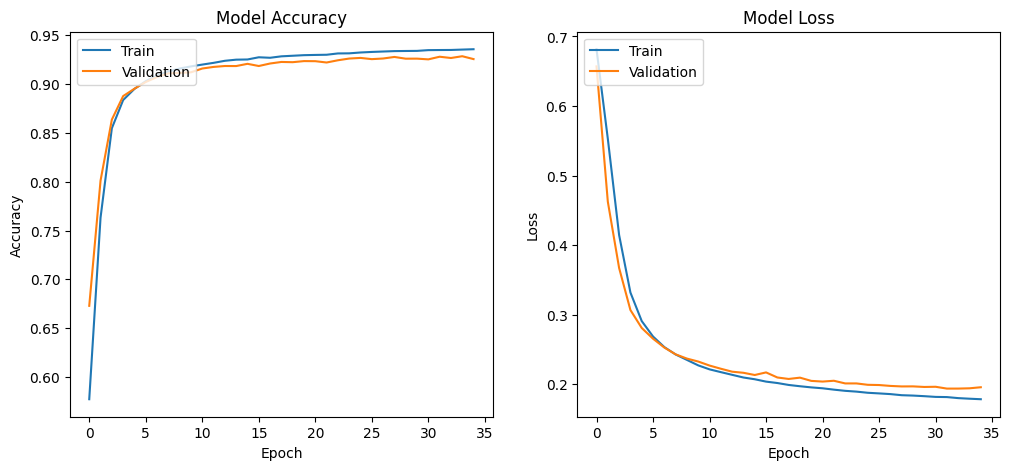

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

839/839 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step


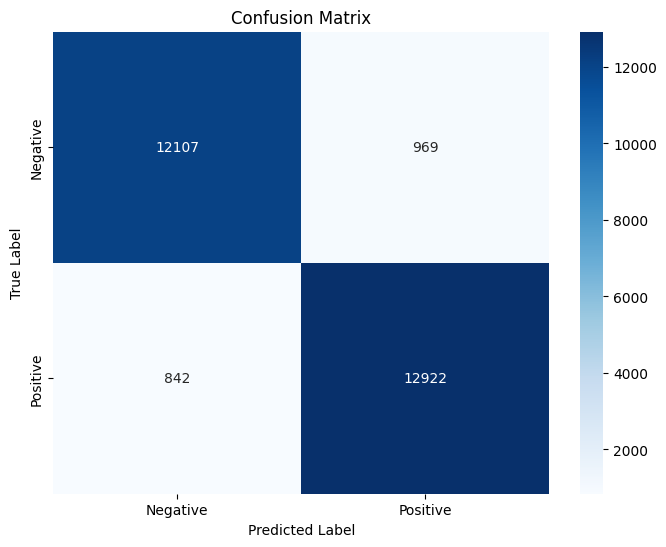

              precision    recall  f1-score   support

    Negative       0.93      0.93      0.93     13076
    Positive       0.93      0.94      0.93     13764

    accuracy                           0.93     26840
   macro avg       0.93      0.93      0.93     26840
weighted avg       0.93      0.93      0.93     26840



In [45]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Make predictions on the test set
y_pred_prob = model.predict(X_test)

# Step 2: Convert probabilities to binary labels
y_pred = (y_pred_prob > 0.5).astype(int)

# Step 3: Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 4: Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Optional: Print a classification report for detailed metrics
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


In [46]:
model.save('verity_function3.h5')


Re training process

In [190]:
from tensorflow.keras.models import load_model

# Load the saved model
model2 = load_model('/content/verity_function3.h5')


In [191]:
# Load dataset from a local CSV file
custom_data = pd.read_csv('/content/drive/MyDrive/Truth seek/Function3_data.csv')

# Display the first few rows to check if it's loaded correctly
custom_data.head()

,heading,content,label,Word count,Max word length,Min word length,Average word length,present_verbs,past_verbs,adjectives,...,PERSON,ORDINAL,TIME,NORP,FAC,WORK_OF_ART,MONEY,PERCENT,LAW,LANGUAGE
0,New largest dinosaur species found in Australi...,Scientists in Australia lack declassify a old ...,1,379.0,16.0,1.0,5.242744,47.0,0.0,40.0,...,5.405405,2.702703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SAITM issue: President to discuss with stakeho...,President Maithripala Sirisena disinherit summ...,1,117.0,20.0,1.0,5.683761,22.0,0.0,6.0,...,25.000000,NaN,12.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Intern’l responsibilities crucial for developm...,Norwegian Prime Minister Erna Solberg said tod...,1,251.0,16.0,1.0,5.840637,38.0,0.0,27.0,...,25.000000,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN
3,Five remanded over assault on Sri Lankan HC,"Five people , who differ arrested for allegedl...",1,126.0,14.0,1.0,5.214286,17.0,0.0,6.0,...,17.391304,NaN,4.347826,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Banners with LTTE chief's pic land duo in jail,Two nonmember of a fringe Tamil nationalist pa...,1,169.0,12.0,1.0,5.313609,23.0,0.0,11.0,...,25.000000,3.571429,NaN,3.571429,3.571429,NaN,NaN,NaN,NaN,NaN


In [192]:
# Ensure 'text' column contains strings
custom_data['content'] = custom_data['content'].astype(str)

# Replace NaN or missing values with empty strings
custom_data['content'] = custom_data['content'].fillna('')

In [193]:
# Clean and preprocess the data
def clean_text(text):
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)  # Remove multiple spaces
    text = text.lower().strip()  # Convert to lowercase and strip leading/trailing spaces
    return text

custom_data['content'] = custom_data['content'].apply(clean_text)


In [194]:
# Separate data into '0' and '1' classes
data_00 = custom_data[custom_data['label'] == 0]
data_11 = custom_data[custom_data['label'] == 1]

In [195]:
from sklearn.utils import resample


In [196]:
#Randomly oversample the minority class to match the majority class
data_11_oversampled = resample(data_11,
                             replace=True,    # Sample with replacement
                            n_samples=len(data_00),  # Match number of majority class
                           random_state=42)  # For reproducibility

#Combine the majority class with the oversampled minority class
data_balanced1 = pd.concat([data_00, data_11_oversampled])

In [197]:
# Shuffle the combined dataset to mix the samples
data_balanced1 = data_balanced1.sample(frac=1, random_state=42).reset_index(drop=True)

# Separate features and target
x_balanced1 = data_balanced1.drop(columns=['label'])
y_balanced1 = data_balanced1['label']

In [198]:
num_rows = x_balanced1.shape[0]
print(f'Number of rows: {num_rows}')

Number of rows: 1712


In [199]:
data_balanced1['label'].value_counts()

,count
label,
0,856
1,856


In [200]:
# Tokenizer and padding
tokenizer1 = Tokenizer(num_words=max_words)
tokenizer1.fit_on_texts(data_balanced1['content'])
sequences1 = tokenizer1.texts_to_sequences(data_balanced1['content'])
tweet_data1 = pad_sequences(sequences1, maxlen=max_seq_length)

# Target variable
target1 = y_balanced1.values

In [201]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(tweet_data1, target1, test_size=0.2, random_state=42)


In [202]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)

In [203]:
from tensorflow.keras.callbacks import EarlyStopping

# Compile the model (ensure it uses the same configuration as before)
model2.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])  # Change to a less suitable loss function

# Train the model with custom data
callbacks = [EarlyStopping(patience=2, monitor='val_loss', restore_best_weights=True)]
history2 = model2.fit(X_train1, y_train1, epochs=10, batch_size=64,
                    validation_split=0.2, callbacks=callbacks)


Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - accuracy: 0.6352 - loss: 0.2770 - val_accuracy: 0.8686 - val_loss: 0.0986
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step - accuracy: 0.9251 - loss: 0.0627 - val_accuracy: 0.9745 - val_loss: 0.0170
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 240ms/step - accuracy: 0.9650 - loss: 0.0248 - val_accuracy: 0.9854 - val_loss: 0.0140
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.9839 - loss: 0.0137 - val_accuracy: 0.9854 - val_loss: 0.0118
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.9906 - loss: 0.0086 - val_accuracy: 0.9891 - val_loss: 0.0078
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.9896 - loss: 0.0083 - val_accuracy: 0.9927 - val_loss: 0.0068
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - accuracy: 0.9898 - loss: 0.0090 - val_accuracy: 0.9927 - val_loss: 0.0063
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 208ms/step - accuracy: 0.9776 - loss: 0.0118 - val_accuracy: 0.

In [204]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the model
loss, accuracy = model2.evaluate(X_test1, y_test1)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9796 - loss: 0.0166
Test Accuracy: 97.67%


In [205]:
# Make predictions on the test set
y_pred_prob1 = model2.predict(X_test1)
y_pred1 = (y_pred_prob1 > 0.5).astype(int)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test1, y_pred1)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


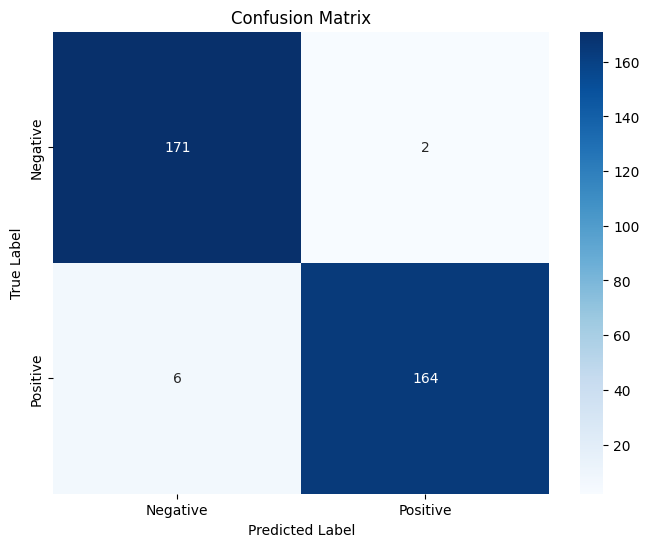

              precision    recall  f1-score   support

    Negative       0.97      0.99      0.98       173
    Positive       0.99      0.96      0.98       170

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343



In [206]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print a classification report
print(classification_report(y_test1, y_pred1, target_names=['Negative', 'Positive']))


In [208]:
# Save the retrained model
model2.save('verity_function3_retrained.h5')